# Формула

**Шаг 1** Формула имеет следующий вид:
$$
y = w_1x + w_0\cdot1 = w_1x_1 + w_0x_0
$$

Кроме значения фичи $x_1$ ввели специальную фичу $x_0$, которая всегда равна единице. 

**Шаг 2** У нас есть уравнение для одной точки, а если у нас четыре точки – то есть вместо одного уравнения мы можем написать четыре уравнения (верхний индекс – это номер точки в нашем датасете, от одного до 4):

$$
\left\{
\begin{array}{l}
y^1 = w_1x^1_1 + w_0x^1_0 \\
y^2 = w_1x^2_1 + w_0x^2_0 \\
y^3 = w_1x^3_1 + w_0x^3_0 \\
y^4 = w_1x^4_1 + w_0x^4_0 \\
\end{array}
\right.
$$

Заметьте, что координаты точек меняются, а вот коэффициенты $w_1, w_0$ присутствуют в каждом уравнении. Суть линейной регрессии как раз в том, чтобы определить наилучшие коэффициенты $w_1, w_0$ такие, чтобы все четыре уравнения решились (хотя бы приближенно). 

**Шаг 3** Перейдём в векторным обозначениям
$$
\left.
\begin{array}{l}
(w_1, w_0) = \overline{w} \\
(x_1, x_0) = \overline{x} \\
\end{array}
\right.
$$

Тогда для каждой точки нашего датасета сумму можно переписать в виде произведения двух векторов
$$
y^1 = \overline{x}^1\cdot\overline{w} \\
y^2 = \overline{x}^2\cdot\overline{w} \\
y^3 = \overline{x}^3\cdot\overline{w} \\
y^4 = \overline{x}^4\cdot\overline{w} \\
$$

**Шаг 4** Мы переписали каждую сумму в виде умножения векторов. А теперь для для удобства записи мы перейдем к матричному умножению (подробнее посмотрите на  [википедии](https://ru.wikipedia.org/wiki/Умножение_матриц)):

$$
Y = X\cdot\overline{w}
$$

Двумерный массив (в машинном обучении он называется *матрица*) $X$ содержит 4 строки (по числу обучающих объектов) и 2 столбца (по числу фичей) и называется матрицей объекты-признаки.

Очень круто! Мы по шагам свернули большую формулу из чётырех строчек в одну строку как же нам это поможет? Оказывается, чтобы решить нашу систему из пяти уравнений, математики вывели формулу, которая в векторно-матричном виде выглядит так:

$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

#  Подготовка

## Импорт библиотек

In [91]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции
matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [2]:
# Загружаем данные
houses = pd.read_csv("houses.csv")

In [3]:
houses.head()

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0


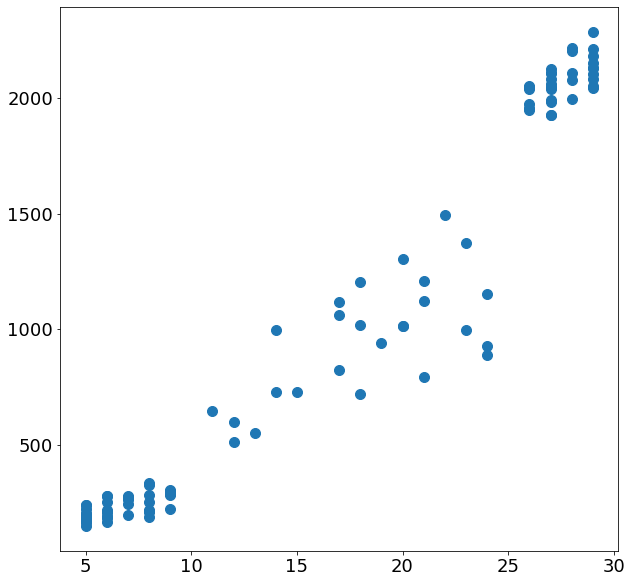

In [9]:
# Создаем график
fig  = plt.figure(figsize=(10, 10))
ax = plt.axes()

# Помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)

# Отображаем график
plt.show()

# Требования к входным данным

Чтобы линейная регрессия хорошо работала должны выполняться следующие требования:
* остатки регрессии (величины $y_i-\hat{y_i}$) должны иметь нормальное (гауссово) распределение (это можно проверить, например, построив гистограмму)
* все фичи должны быть примерно в одном масшабе

При подготовке данных для обучения линейной регрессии применяются следyющие приемы: масштабирование и нормализация.

## Масштабирование

Для первичной обработки данных, для борьбы с большими по модулю значениями, которые являются выбросами обычно используют

* логарифмирование np.log
* извлечение квадратного корня np.sqrt

Оба этих преобразования являются *монотонными*, т.е. они меняют абсолютные значения, но сохраняют порядок величин. Пример немонотонного преобразования для  величины $x$ – функция $\sin x$

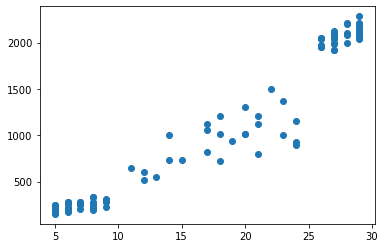

39749.49747226209


In [129]:
y = np.array(houses["price"])
X = np.array([houses["dim_1"]]).reshape(-1,1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
plt.scatter(X, y)
plt.show()
print(mean_squared_error(y, y_pred))

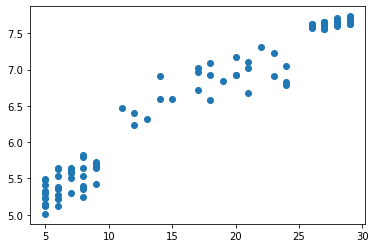

0.04085580782334705


In [131]:
c = np.log(y)

reg = LinearRegression().fit(X, y_transformed)
y_pred = reg.predict(X)

plt.scatter(X, y_transformed)
plt.show()
print(mean_squared_error(y_transformed, y_pred))

## z-score

Более интересный метод - это Standart Scaling или Z-score normalization. Это преобразование позволяет "сгладить" данные, избавить их от выбросов.

In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

raw_data = np.array([
    1.,  3.,  2.,  4.,  2., 10.,  2.,  5.,  2.,  2.,  1.,  7.,  5.,  2.,  5., 16., 10.,  3.,24.],
    dtype=np.float32
)

print("Сырой датасет: %s" % raw_data)

transformed_data = StandardScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print("z-transform датасет: %s" % transformed_data)

Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
z-transform датасет: [-0.7986022  -0.4497874  -0.6241948  -0.27538007 -0.6241948   0.7710641
 -0.6241948  -0.10097269 -0.6241948  -0.6241948  -0.7986022   0.24784204
 -0.10097269 -0.6241948  -0.10097269  1.8175085   0.7710641  -0.4497874
  3.2127674 ]


Мы видим, что в результате $z$-трансформации данные сместились в сторону нуля (появились как отрицательные значения, так и положительные) а так же уменьшился масштаб – данные похожи на нормальное (гауссовское) распределение)

## min-max normalization



Другой распространённый метод называется MinMax Scaling. Этот метод переносит все точки на отрезок [0;1]
$$
X_{scaled} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

In [133]:
from sklearn.preprocessing import MinMaxScaler


print("Сырой датасет: %s" % raw_data)

transformed_data = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)

print("Min-Max scale датасет: %s" % transformed_data)

Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
Min-Max scale датасет: [0.         0.08695652 0.04347826 0.13043478 0.04347826 0.39130437
 0.04347826 0.17391305 0.04347826 0.04347826 0.         0.2608696
 0.17391305 0.04347826 0.17391305 0.65217394 0.39130437 0.08695652
 1.        ]


Эта трансформация оцень полезна для визуализации данных – позволяет "ужать" точки в единичный отрезок и компактно отобразить их на графике. Полезна тем, что сохраняет относительные расстояния между точками (т.е. структуру датасета)

Как применять эти знания на практике? Используйте следующий алгоритм:

* построить модель
* вычислить метрику качества
* выполнить преобразования
* снова вычислить метрику качества
* если метрика качества выросла, применить найденную трансформацию ко входным данным перед тем, как подавать на вход модели

# Создание модели линейной регрессии

##  Создание регрессора по формуле

### Вычисление по формуле

In [109]:
X_1 = np.array([houses["dim_1"]]).reshape(-1,1)

#X_2 = np.array([houses["dim_2"]]).reshape(-1,1)

X = np.hstack((np.ones([X_1.shape[0], 1], X_1.dtype), X_1))

Y = np.array([houses["price"]]).reshape(-1,1)

Сначала перемножим матрицу *объекты-признаки* саму на себя
$$
X^T\cdot X
$$

In [110]:
X_T_X = (X.T).dot(X)

X_T_X

array([[  100,  1640],
       [ 1640, 35534]])

Теперь найдём обратную матрицу к ней.
$$
\left(X^TX\right)^{-1}
$$

In [111]:
from numpy.linalg import inv

X_T_X_inverted = inv(X_T_X)

X_T_X_inverted

array([[ 0.04113684, -0.00189859],
       [-0.00189859,  0.00011577]])

Ну, осталось дописать формулу до конца
$$
\left(X^TX\right)^{-1}X^TY
$$

In [112]:
w = X_T_X_inverted.dot(X.T).dot(Y)

print("w_1=%.5f, w_2=%.3f" % (w[0][0],w[1][0]))
w

w_1=-351.68470, w_2=83.089


array([[-351.68469785],
       [  83.08870109]])

### Построение графика

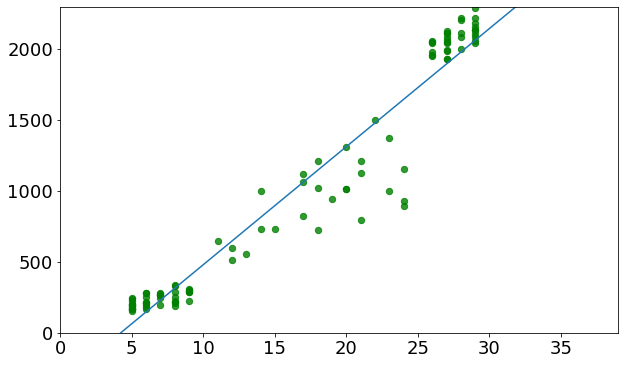

In [113]:
# задаём границы координатных осей
margin = 10
X_min = 0
X_max = X[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0][0] + w[1][0]*X_support

# настройка графика 
plt.figure(figsize=(10, 6)) # создаем картинку
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.plot(X_support, Y_model)

plt.show()

##  Создание регрессора с помощью библиотеки

###  Создание модели

In [ ]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1"]]
y = houses["price"]

In [13]:
# создаем регрессор
reg = LinearRegression().fit(X, y)

# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1):
    return a + b * dim_1

###  Строим график нашей модели

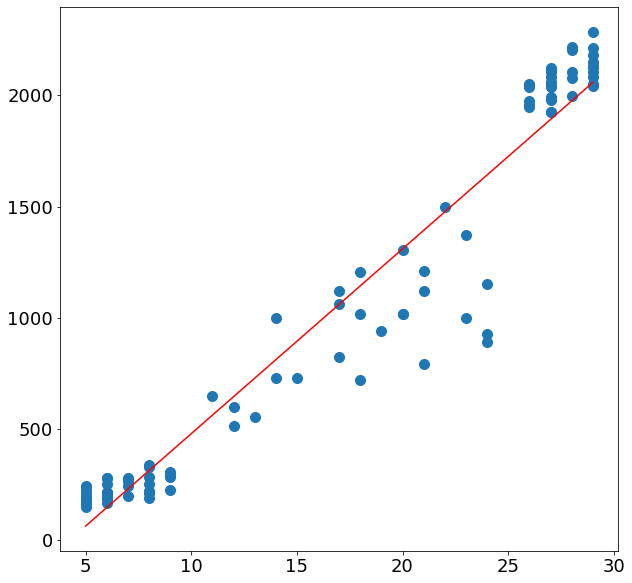

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)
# помещаем предсказания
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="red")

# отображаем картинку
plt.show()

# Создание модели с 2 признаками

## Формула линейной  регрессии с 2 признаками

$y' = w_2' * x_2 + w_1' * x_1' + w_0'$

## Строим график по 2 признакам

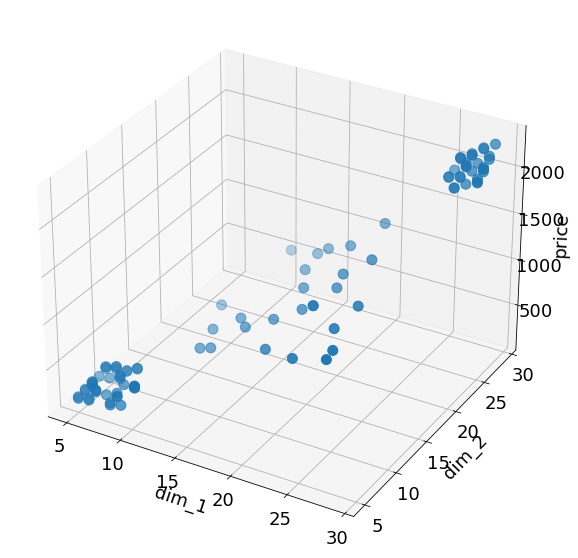

In [16]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

##  Деление выборки

In [18]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1", "dim_2"]]
y = houses["price"]

## Создание регрессора по 2 признакам

In [19]:
# создаем регрессор
reg = LinearRegression().fit(X, y)

# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [20]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Строим график нашей модели

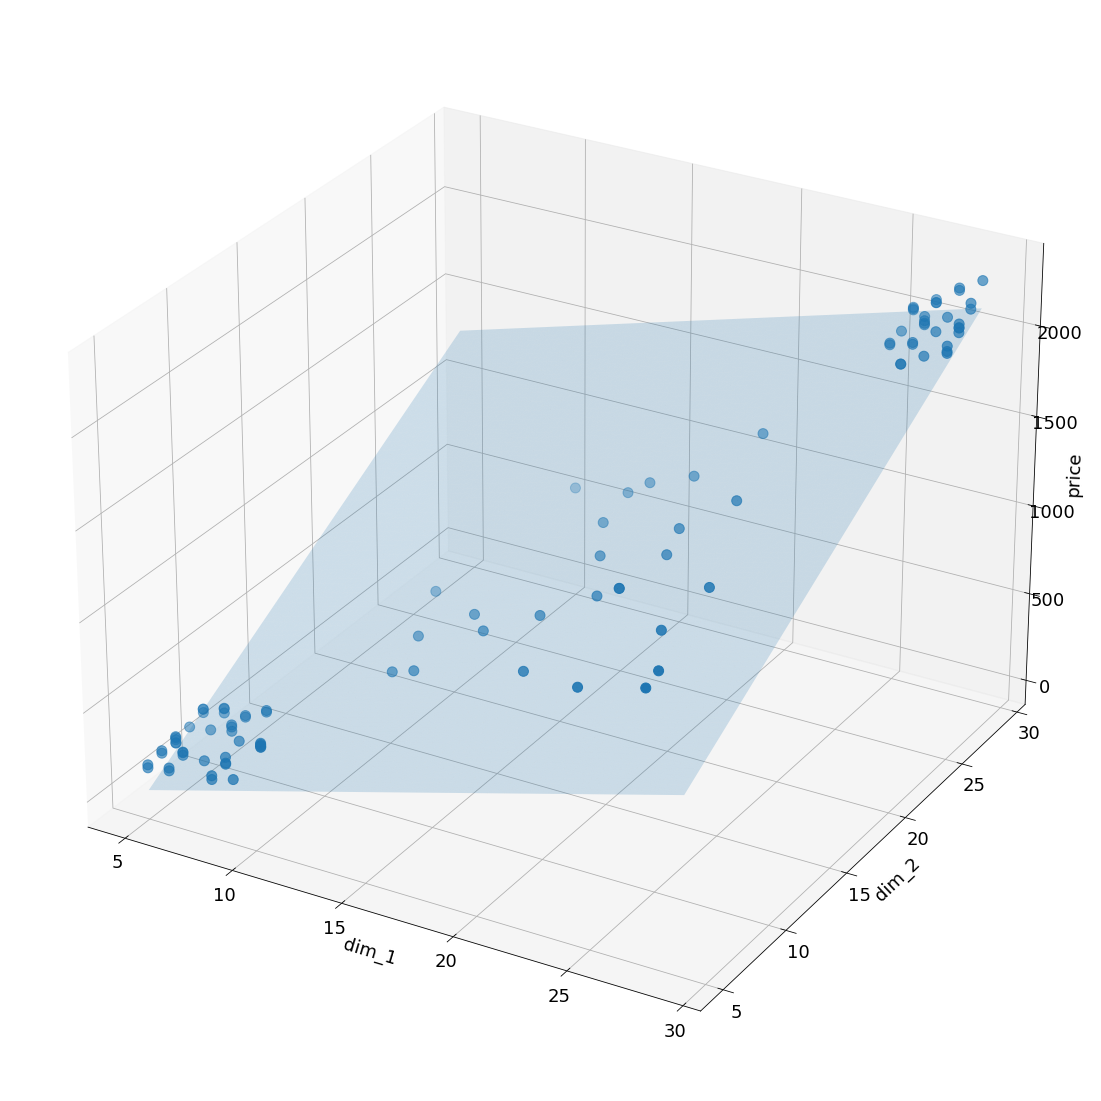

In [21]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

#  Метрики качества

В задачах машинного обучения мы хотим сравнивать несколько моделей машинного обучения и выбирать наилучшую из них. Решение о том, какая модель хорошая, а какая плохая, принимается на основе одной или нескольких *метрик* моделей машинного обучения.

Метрики принимают на вход два вектора, предсказания модели и истинные значения, после чего вычисляют по этим векторам качество модели.

Сначала загрузим данные эксперимента, датасет с ценами на дома в Бостоне

In [95]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

california_dataset = fetch_california_housing()

features = california_dataset.data
y = california_dataset.target

reg = LinearRegression().fit(features, y)

y_pred = reg.predict(features) # предсказанное значение
y_true = y # истинное значение

Теперь посмотрим, какие функции можно применять к этим двум наборам точек

## Mean absolute error (MAE)

Для оценки качества регрессии можно использовать среднюю абсолютную ошибку

*Mean Absolute Error* - это просто сумма отклонений истинных значений $y$ от предсказаний нашей модели:

$$
\text{absolute error} = |y_1 - \hat{y}_1| + |y_2 - \hat{y}_2| + \ldots
$$

А потом мы эту сумму делим на количество точек - получаем среднюю ошибку

Метрика принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

In [96]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    reg.predict(features), y)
)

MAE = 0.5311643817546444


## Mean Squared Error (MSE)

Это базовая метрика для определения качества линейной регрессии

Для каждого предсказанного значения $\hat{y}_i$ мы считаем квадрат отклонения от фактического значения и считаем среднее по полученным величинам

В целом логика та же, что в *MAE*, только усреднять мы будем квадраты ошибок 
$$
\text{absolute error} = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots
$$

Эта метрика тоже принимает только положительные значения! Чем ближе к нулю, тем лучше модель.

Эта ошибка визуально похожа на  *MSE*, но на графике видно, что *MAE*(красная линия) почти всегда меньше по значению, чем MSE (синяя линия). Это значит, что *MSE* более "пессимистична" и сильнее штрафует за большие ошибки - т.е. MSE лучше применять, когда вы уверены что в выборке нет "выборосов" (англ. outliers) - значений, который очень сильно отличаются от остальных точек. В этом случае MSE может быть очень плохой, а на деле ситуация приемлема. Если выбросы есть, лучше применять MAE.

In [97]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)

print('MSE = %s' % mse)

MSE = 0.5243209861846071


## $R^2$ (коэффициент детерминации)

Название - калька английского термина *coefficient of determination*. Наилучшее возможное значение 1.0, чем меньше тем хуже. Если этот коэффициент близок к 1, то условная дисперсия модели (то есть разброс предсказаний модели $\hat{y}$ относительно разброса самой целевой переменной $y$ ) достаточно мала - то есть модель неплохо описывает данные. Коэффициент может быть даже отрицательным - то это значит, что модель совсем уж плохая.

Эта метрика хороша тем, что она *нормализована*, то есть не превышает единицу - удобно сравнивать разные модели. Например, метрика $MSE$ может принимать ничем не ограниченные значения больше нуля - это не всегда удобно.

In [98]:
from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

r2_score = 0.6062326851998051
